In [114]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from scipy.optimize import minimize

In [131]:
tickers = ['XOM' ,'GE' ,'MSFT', 'BP', 'C', 'PG', 'WMT', 'PFE', 'HBC', 'TM', 'JNJ', 'BAC', 'AIG', 'NVS', 'MO', 'GSK',  'JPM',  'GOOG', 'HD', 'WB',  'NOK', 'UNH', 'TWX', 'QCOM', 'ING']

In [132]:
end_date = datetime.today()
print(end_date)

2024-05-19 16:49:28.161104


In [133]:
start_date = end_date - timedelta(days = 7* 365)
print(start_date)

2017-05-21 16:49:28.161104


In [134]:
adjusted_close_df = pd.DataFrame()


In [135]:
for ticker in tickers :
    data  =  yf.download(ticker , start = start_date , end = end_date)
    adjusted_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [136]:
print(adjusted_close_df)

                   XOM          GE        MSFT         BP          C  \
Date                                                                   
2017-05-22   59.008221  123.065392   63.007275  25.096340  48.455482   
2017-05-23   59.216175  123.502121   63.218979  25.075972  48.971310   
2017-05-24   59.008221  121.536903   63.301804  25.055605  49.415703   
2017-05-25   58.621002  120.052078   64.084244  24.716097  49.161755   
2017-05-26   58.477592  119.877335   64.397186  24.722887  49.256985   
...                ...         ...         ...        ...        ...   
2024-05-13  116.960007  159.500000  412.975098  37.660072  63.400002   
2024-05-14  117.669998  160.000000  415.809998  37.521690  63.590000   
2024-05-15  118.580002  163.470001  423.079987  37.323997  64.239998   
2024-05-16  117.870003  161.119995  420.989990  37.110001  64.139999   
2024-05-17  119.639999  159.889999  420.209991  37.490002  64.070000   

                    PG        WMT        PFE           HBC     

In [137]:
#Calculation of log-normal returns

In [138]:
log_returns = np.log(adjusted_close_df / adjusted_close_df.shift(1))
print(log_returns)
#drop missing values         -> check later why not fill
log_returns = log_returns.dropna()
print(log_returns)

                 XOM        GE      MSFT        BP         C        PG  \
Date                                                                     
2017-05-22       NaN       NaN       NaN       NaN       NaN       NaN   
2017-05-23  0.003518  0.003542  0.003354 -0.000812  0.010589 -0.001509   
2017-05-24 -0.003518 -0.016040  0.001309 -0.000813  0.009034  0.004867   
2017-05-25 -0.006584 -0.012292  0.012285 -0.013643 -0.005152  0.004153   
2017-05-26 -0.002449 -0.001457  0.004871  0.000275  0.001935  0.004480   
...              ...       ...       ...       ...       ...       ...   
2024-05-13 -0.000424 -0.024035 -0.002462  0.006847 -0.002048 -0.005891   
2024-05-14  0.006052  0.003130  0.006841 -0.003681  0.002992 -0.000663   
2024-05-15  0.007704  0.021456  0.017333 -0.005283  0.010170  0.004514   
2024-05-16 -0.006006 -0.014480 -0.004952 -0.005750 -0.001558  0.008075   
2024-05-17  0.014905 -0.007663 -0.001854  0.010188 -0.001092 -0.001311   

                 WMT       PFE       

In [139]:
# covariance matrix using annualized  log returns

In [140]:
cov_matrix = log_returns.cov()*252
print(cov_matrix)

           XOM        GE      MSFT        BP         C        PG       WMT  \
XOM   0.028897  0.011775  0.012752  0.021227  0.013688  0.008021  0.009072   
GE    0.011775  0.080547  0.009405  0.012452  0.017064  0.004630  0.005539   
MSFT  0.012752  0.009405  0.046698  0.014148  0.017344  0.007541  0.011561   
BP    0.021227  0.012452  0.014148  0.034001  0.012053  0.005037  0.006741   
C     0.013688  0.017064  0.017344  0.012053  0.038688  0.004113  0.009061   
PG    0.008021  0.004630  0.007541  0.005037  0.004113  0.019620  0.010822   
WMT   0.009072  0.005539  0.011561  0.006741  0.009061  0.010822  0.052539   
PFE   0.011025  0.012331  0.014418  0.007370  0.014144  0.007619  0.012450   
HBC  -0.001392  0.004544  0.000334 -0.001800  0.003540  0.002038  0.005405   
TM    0.011149  0.010318  0.015260  0.011820  0.013928  0.008348  0.010211   
JNJ   0.011595  0.007607  0.016891  0.007225  0.012861  0.011671  0.013015   
BAC   0.014956  0.021257  0.021410  0.014344  0.036713  0.004106

In [141]:
#Calculate Portfolio's risk by portfolio standard deviation  

In [142]:
def standard_deviation (weights , cov_matrix) :
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

In [143]:
#calculate the expected return

In [144]:
def expected_return (weights , log_returns) :
    return np.sum(log_returns.mean() * weights ) * 252

In [145]:
#calculation of sharpe ratio = (portfolio_return - risk free rate)/ standard_deviation

In [146]:
def sharpe_ratio (weights , log_returns , cov_matrix , risk_free_rate) :
    return (expected_return (weights , log_returns )  - risk_free_rate ) / standard_deviation(weights , cov_matrix)

In [147]:
#risk_free_rate : either assume any value(ex : 0.02 ) or feed api for the fred api (6c9643158baa1fc7628cdd687a7ca284 )

In [148]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [149]:

from fredapi import Fred

fred = Fred(api_key = '6c9643158baa1fc7628cdd687a7ca284')
ten_year_treasury_rate = fred.get_series_latest_release('GS10') / 100

#risk_free_rate
risk_free_rate = ten_year_treasury_rate.iloc[-1]
print(risk_free_rate)

0.0454


In [150]:
#define the function to minimize (negative sharoe ratio)

In [151]:
def neg_sharpe_ratio(weights , log_returns , cov_matrix , risk_free_rate):
    return -sharpe_ratio(weights , log_returns , cov_matrix , risk_free_rate)
    

In [152]:
## One important thing is to make sure to follow all the constraints
# 1. sum of all weights is equal to 1
# 2. Each weight should be between 0 and 1

In [153]:
constraints = { 'type' : 'eq' , 'fun' : lambda weights : np.sum(weights)-1}
bounds = [(0,0.30) for _ in range(len(tickers))] #we cant sell any asset i.e only long position 
                                                #and 0.5 means cant allocate any particular asset more than 50%

In [154]:
#set the initial weights

In [155]:
initial_weights  = np.array([1/len(tickers)]*len(tickers))
print(initial_weights)

[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]


In [156]:
#optimize weights to maximize sharpe ratio

In [157]:
optimized_results = minimize(neg_sharpe_ratio , initial_weights , args = (log_returns , cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)

In [158]:
#optimal weights

In [159]:
optimal_weights = optimized_results.x

In [161]:
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
XOM: 0.0000
GE: 0.0000
MSFT: 0.3000
BP: 0.2267
C: 0.0000
PG: 0.0000
WMT: 0.0000
PFE: 0.0000
HBC: 0.0000
TM: 0.0942
JNJ: 0.0000
BAC: 0.0000
AIG: 0.0000
NVS: 0.0000
MO: 0.0000
GSK: 0.0000
JPM: 0.0539
GOOG: 0.0000
HD: 0.0252
WB: 0.0000
NOK: 0.0000
UNH: 0.3000
TWX: 0.0000
QCOM: 0.0000
ING: 0.0000
Expected Annual Return: 0.3250
Expected Volatility: 0.1432
Sharpe Ratio: 1.9527


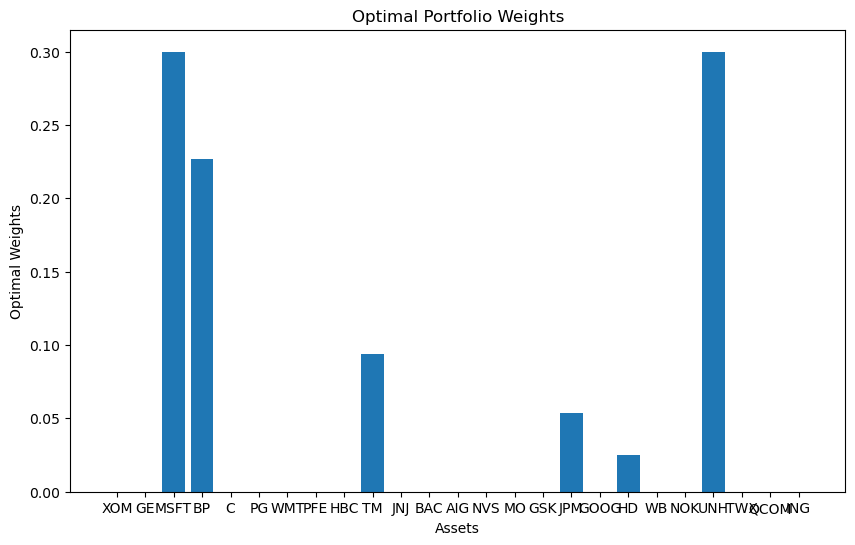

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()